In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical 
from matplotlib import pyplot as plt 

## Importazione DataSet

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path = 'mnist.npz')

## Normalizzazione e Flatting per i dati di x (images) e codifica one-hot per i dati di y (labels)

In [3]:
train_images = (train_images / 255)
test_images = (test_images / 255)
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Creazione e impostazione di un modello di ANN Functional Keras con l'applicazione delle Residual Network

In [5]:
input = Input(shape = (train_images.shape[1]))

dense_16_relu = Dense(units=16, activation='relu')

dense = dense_16_relu(input)
dense2 = Dense(units=16, activation='relu')(dense)
dense3 = Dense(units=16)(dense2)

res1 = Add()([dense, dense3])
res1 = Activation('relu')(res1)

dense4 = Dense(units=16, activation='relu')(res1)
dense5 = Dense(units=16, activation='relu')(dense4)
dense6 = Dense(units = 16)(dense5)

res2 = Add()([dense4, dense6])
res2 = Activation('relu')(res2)

dense7 = Dense(units=16, activation='relu')(res2)
dense8 = Dense(units=16, activation='relu')(dense7)
dense9 = Dense(units = 16)(dense8)

res3 = Add()([dense7, dense9])
res3 = Activation('relu')(res3)

output = Dense(units = 10, activation = 'softmax')(res3)

model = tf.keras.models.Model(
    inputs=[input],
    outputs = [output],
    name = 'ResidualNet'
)

model.compile(
    optimizer = Adam(lr=0.005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "ResidualNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 16)                   12560     ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 16)                   272       ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 16)                   272       ['dense_1[0][0]']             
                                                                                        

## Addestramento del modello 

In [6]:
history_res = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)

Epoch 1/50
118/118 [==============================] - 6s 10ms/step - loss: 1.3208 - accuracy: 0.5193 - val_loss: 0.5440 - val_accuracy: 0.8403
Epoch 2/50
118/118 [==============================] - 1s 6ms/step - loss: 0.4114 - accuracy: 0.8820 - val_loss: 0.3336 - val_accuracy: 0.9064
Epoch 3/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2911 - accuracy: 0.9166 - val_loss: 0.2681 - val_accuracy: 0.9250
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2467 - accuracy: 0.9296 - val_loss: 0.2435 - val_accuracy: 0.9286
Epoch 5/50
118/118 [==============================] - 1s 5ms/step - loss: 0.2203 - accuracy: 0.9368 - val_loss: 0.2120 - val_accuracy: 0.9415
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 0.2038 - accuracy: 0.9413 - val_loss: 0.2144 - val_accuracy: 0.9404
Epoch 7/50
118/118 [==============================] - 1s 5ms/step - loss: 0.1888 - accuracy: 0.9448 - val_loss: 0.2066 - val_accuracy: 0.9405
Epoch

## Illustrazione grafica dell andamento del modello sui parametri (loss, vall loss, acc, vall acc)

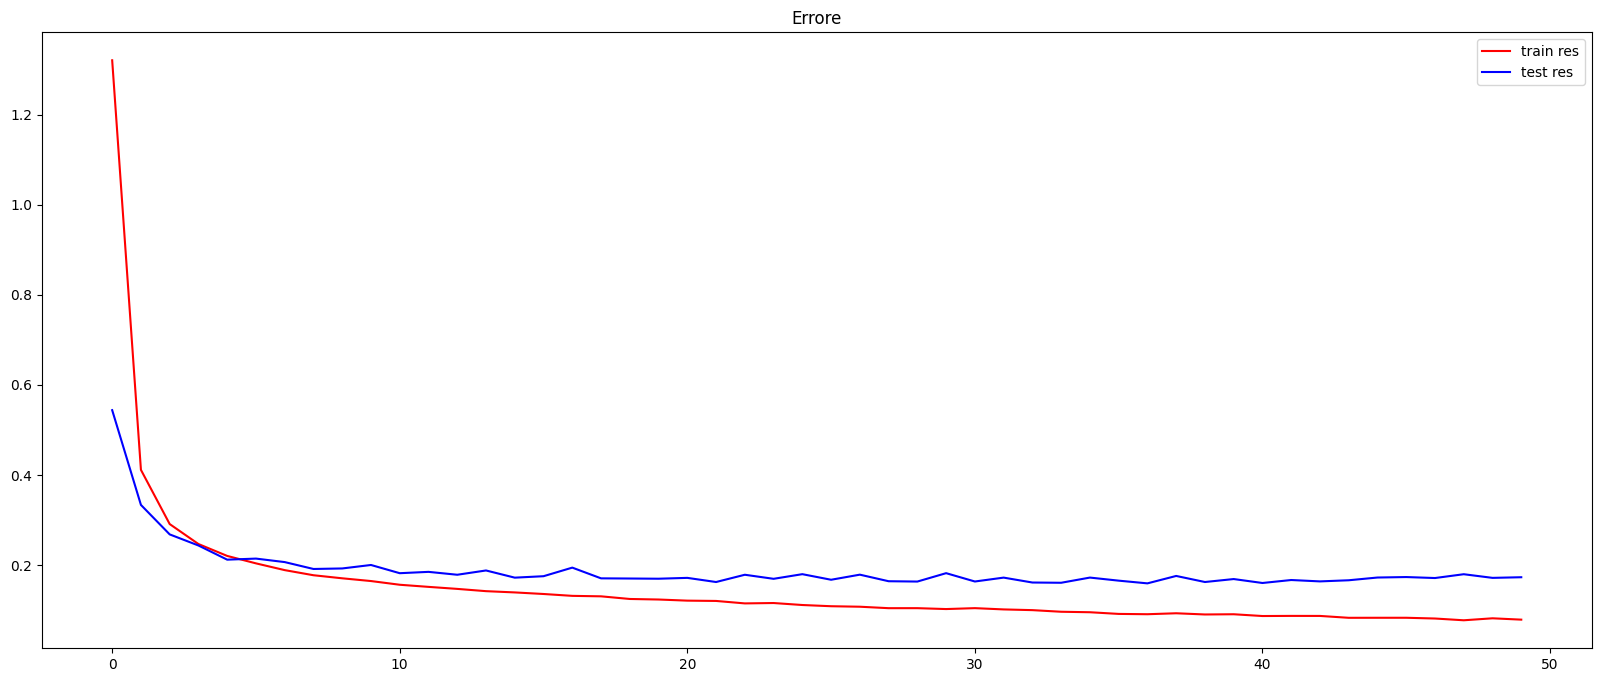

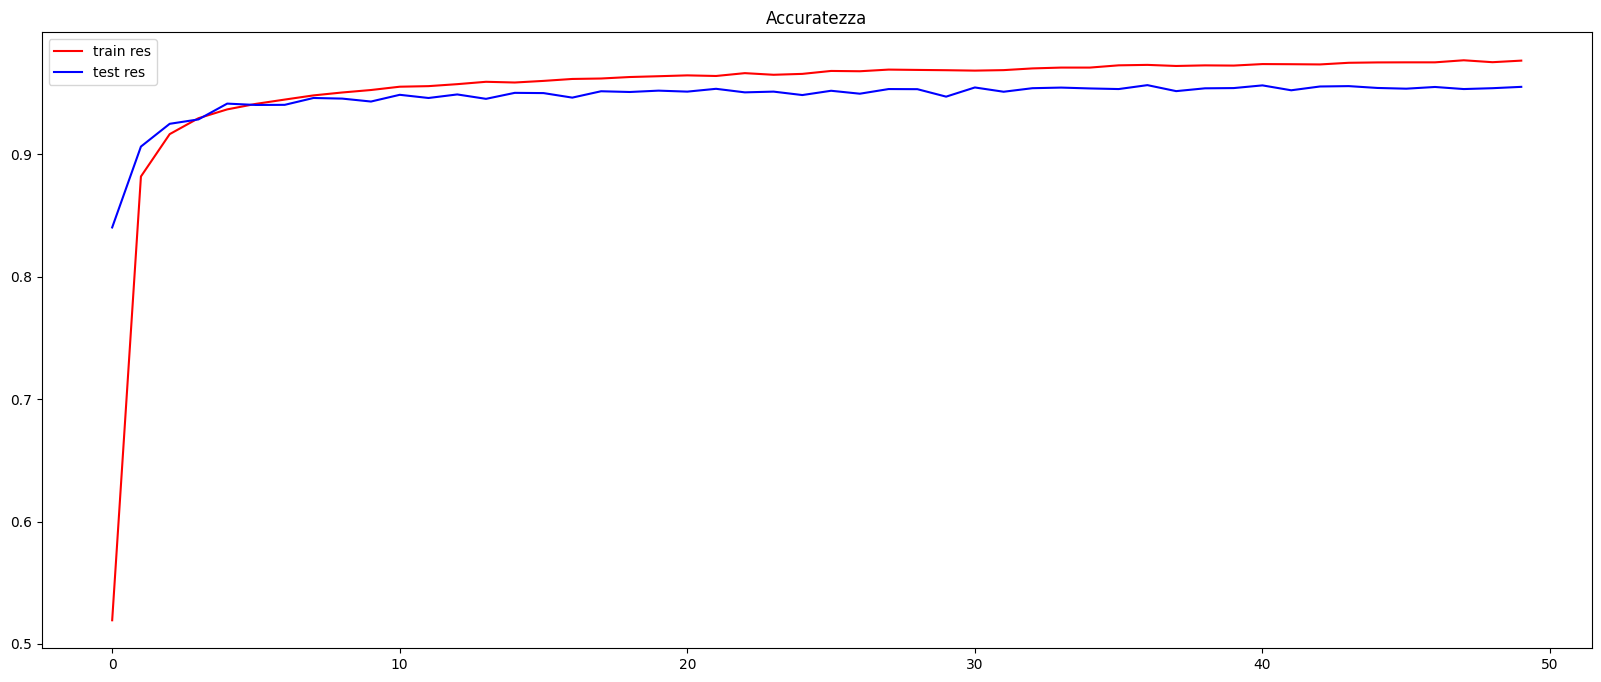

In [7]:
plt.figure(figsize=(20, 8))
plt.plot(history_res.history['loss'], color='red', label='train res')
plt.plot(history_res.history['val_loss'], color='blue', label='test res')
plt.title('Errore')
plt.legend()
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(history_res.history['accuracy'], color='red', label='train res')
plt.plot(history_res.history['val_accuracy'], color='blue', label='test res')
plt.title('Accuratezza')
plt.legend()
plt.show()

In [8]:
evaluations = model.evaluate(
  test_images,
  test_labels
)

for i in range(0, len(model.metrics_names)):
    print("{} -> {}".format(model.metrics_names[i], evaluations[i]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9552
loss -> 0.1730150431394577
accuracy -> 0.9552000164985657
